In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [65]:
url = 'https://mbawa1139.github.io/ETL-Project/motorcycle_accident.html'

In [66]:
tbl = pd.read_html(url)
df = tbl[0]
df = df.drop(df.columns[0], axis=1)
df = df[(df["Age_of_Casualty"] != -1) & (df["Age_of_Casualty"] != 0)]
df

,Accident_Index,Vehicle_Type,Longitude,Latitude,Sex_of_Casualty,Age_of_Casualty
0,201001BS70008,Motorcycle,-0.175802,51.484361,Male,28
1,201001BS70011,Motorcycle,-0.217699,51.514321,Male,21
2,201001BS70016,Motorcycle,-0.173157,51.485669,Male,14
4,201001BS70020,Motorcycle,-0.195276,51.494554,Male,23
5,201001BS70022,Motorcycle,-0.185327,51.494761,Male,37
...,...,...,...,...,...,...
114277,2014984120014,Motorcycle,-3.261808,54.987381,Male,25
114278,2014984121914,Motorcycle,-3.507553,55.408030,Male,59
114279,2014984127714,Motorcycle,-3.479810,55.118296,Male,42
114280,2014984129614,Motorcycle,-3.369973,55.352170,Male,35


In [46]:
df["Age_of_Casualty"].unique()

array([28, 21, 14, 23, 37, 69, 78, 34, 32, 39, 40, 22, 48, 35, 42, 54, 20,
       43, 44, 30, 55, 38, 49, 25, 50, 17, 26, 56, 31, 41, 33, 46, 47, 36,
       24, 19, 29, 59, 27, 70, 73, 45, 61, 18, 62,  9, 57, 53,  8, 64,  5,
       52, 15, 51, 58, 63, 67, 75, 16, 13, 72, 60, 65, 95, 86, 77, 11, 12,
       74, 68, 82,  4, 66,  1, 85,  7,  3, 79, 83, 80, 71, 89, 10, 76,  6,
       90, 84, 91, 87,  2, 81, 88, 92, 94, 93, 97, 96, 98], dtype=int64)

In [55]:
df["Year"] = df["Accident_Index"].str[:4]

df = df[['Accident_Index', 'Year','Vehicle_Type', 'Longitude', 
    'Latitude', 'Sex_of_Casualty', 'Age_of_Casualty']]
df.head()

,Accident_Index,Year,Vehicle_Type,Longitude,Latitude,Sex_of_Casualty,Age_of_Casualty
0,201001BS70008,2010,Motorcycle,-0.175802,51.484361,Male,28
1,201001BS70011,2010,Motorcycle,-0.217699,51.514321,Male,21
2,201001BS70016,2010,Motorcycle,-0.173157,51.485669,Male,14
4,201001BS70020,2010,Motorcycle,-0.195276,51.494554,Male,23
5,201001BS70022,2010,Motorcycle,-0.185327,51.494761,Male,37


In [61]:
# Create the decade bins 
bins = [0, 17, 25, 35, 45, 55, 100]

# Create the names for the bins
group_names = ["Under 18", "18 to 25", "26 to 35", "36 to 45", "46 to 55", "Over 55"]

# coverting year column datatype to interger
df['Age_of_Casualty'] = df['Age_of_Casualty'].astype(int)

# add bin column to dataframe
df["Age_Group"] = pd.cut(df["Age_of_Casualty"], bins, labels=group_names, include_lowest=True)

# reorganize columns
df = df[['Accident_Index', 'Year','Vehicle_Type', 'Longitude', 
         'Latitude', 'Sex_of_Casualty', 'Age_of_Casualty', 'Age_Group']]

df.head()

,Accident_Index,Year,Vehicle_Type,Longitude,Latitude,Sex_of_Casualty,Age_of_Casualty,Age_Group
0,201001BS70008,2010,Motorcycle,-0.175802,51.484361,Male,28,26 to 35
1,201001BS70011,2010,Motorcycle,-0.217699,51.514321,Male,21,18 to 25
2,201001BS70016,2010,Motorcycle,-0.173157,51.485669,Male,14,Under 18
4,201001BS70020,2010,Motorcycle,-0.195276,51.494554,Male,23,18 to 25
5,201001BS70022,2010,Motorcycle,-0.185327,51.494761,Male,37,36 to 45


In [62]:
age_group_df = df.groupby(["Age_Group"])["Age_of_Casualty"].count()
age_group_df

Age_Group
Under 18    13430
18 to 25    30542
26 to 35    22595
36 to 45    19378
46 to 55    16593
Over 55      9991
Name: Age_of_Casualty, dtype: int64

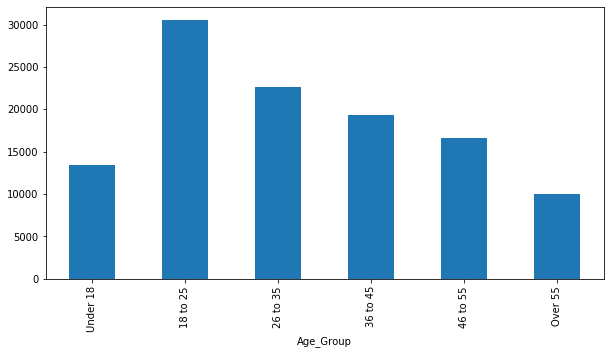

In [63]:
age_group_df.plot(kind="bar", figsize=(10,5))

In [ ]:
sql_lite = "sqlite:///etl_sqlite.db"

# Initial DB connection
engine = create_engine(sql_lite)

In [ ]:
# Read DF into DB
df.to_sql(name='motorcycle_accident', con=engine, if_exists='append', index=False)